In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

data_dir = "/content/drive/MyDrive/IVA"
img_size = 64

classes = sorted(os.listdir(data_dir))
images = []
labels = []

for label, class_name in enumerate(classes):
    class_path = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            images.append(img)
            labels.append(label)
        except:
            print(f"Error loading {img_path}")

images = np.array(images, dtype="float32") / 255.0
labels = np.array(labels)

images = np.expand_dims(images, axis=-1)

labels = to_categorical(labels, num_classes=len(classes))

X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

input_layer = Input(shape=(img_size, img_size, 1))

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(len(classes), activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=500,
    batch_size=32
)

loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,142,150 (4.36 MB)

 Trainable params: 1,142,150 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2083 - loss: 1.7839 - val_accuracy: 0.1667 - val_loss: 1.8241
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.2083 - loss: 1.8314 - val_accuracy: 0.1667 - val_loss: 1.8035
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - accuracy: 0.0833 - loss: 1.8448 - val_accuracy: 0.1667 - val_loss: 1.7964
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.2500 - loss: 1.7877 - val_accuracy: 0.1667 - val_loss: 1.7931
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.1250 - loss: 1.8247 - val_accuracy: 0.1667 - val_loss: 1.7923
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.1667 - loss: 1.7984 - val_accuracy: 0.1667 - val_loss: 1.7924
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.2500 - loss: 1.7859 - val_accuracy: 0.1667 - val_loss: 1.7923
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step - accuracy: 0.1667 - loss: 1.7880 - val_accuracy: 0.1667 - val_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


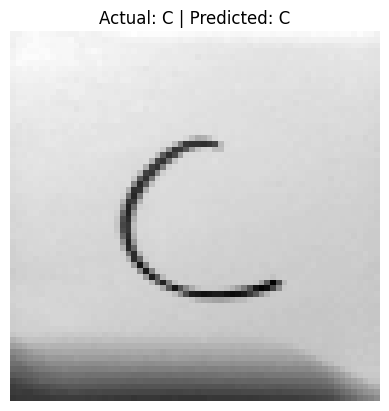

Prediction probabilities: [[3.2919334e-11 2.0744777e-08 9.9995232e-01 1.8329222e-07 4.7427315e-05
  9.7637274e-13]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

idx = np.random.randint(0, len(X_test))

img = X_test[idx]
true_label = classes[np.argmax(y_test[idx])]

pred_probs = model.predict(np.expand_dims(img, axis=0))
pred_label = classes[np.argmax(pred_probs)]

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Actual: {true_label} | Predicted: {pred_label}")
plt.axis('off')
plt.show()

print("Prediction probabilities:", pred_probs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Layer: input_layer_1 | Output shape: (1, 64, 64, 1)


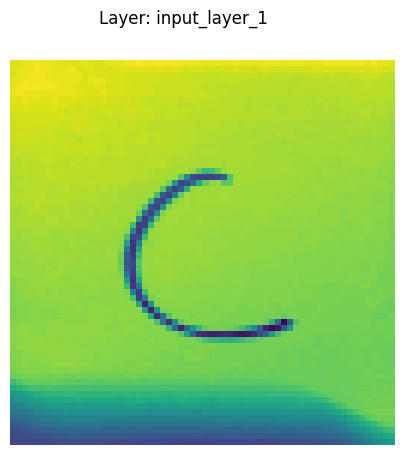

Layer: conv2d_3 | Output shape: (1, 64, 64, 32)


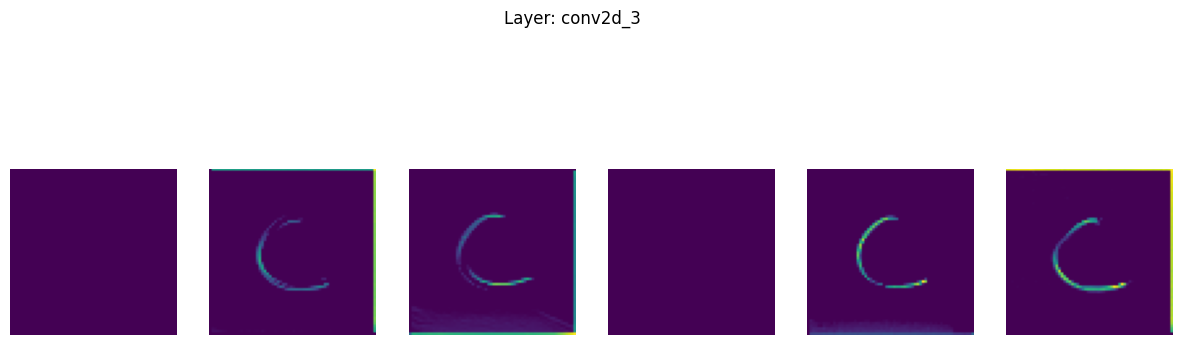

Layer: max_pooling2d_3 | Output shape: (1, 32, 32, 32)


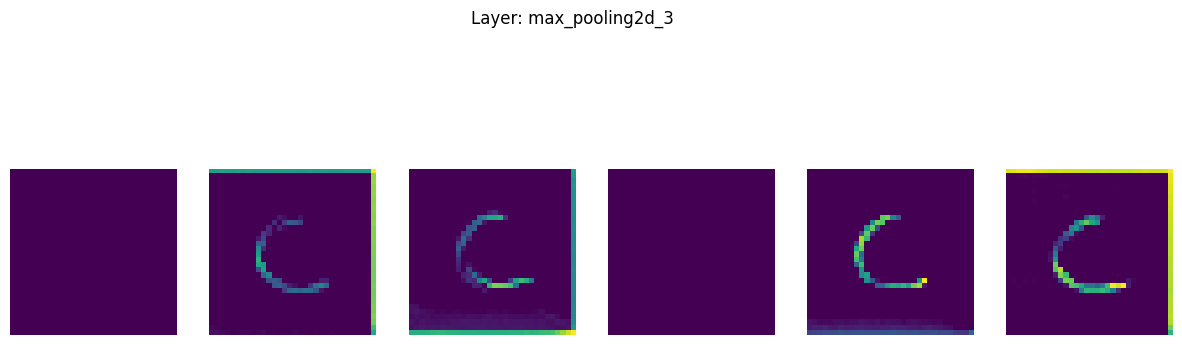

Layer: conv2d_4 | Output shape: (1, 32, 32, 64)


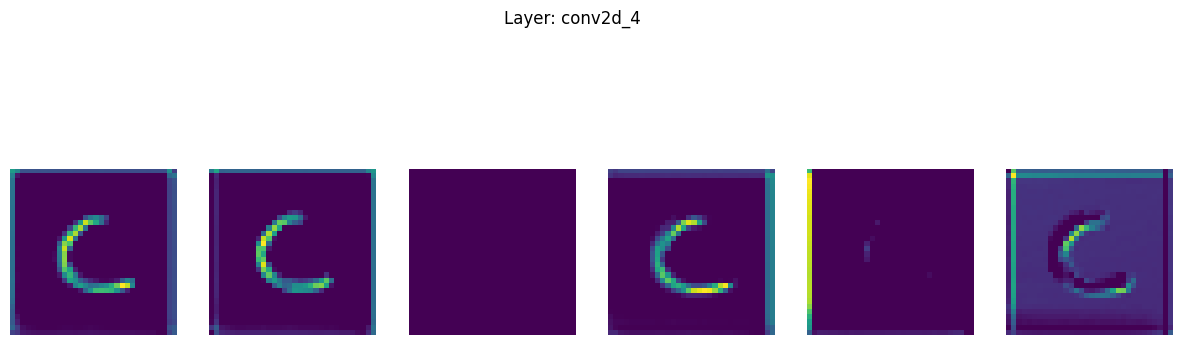

Layer: max_pooling2d_4 | Output shape: (1, 16, 16, 64)


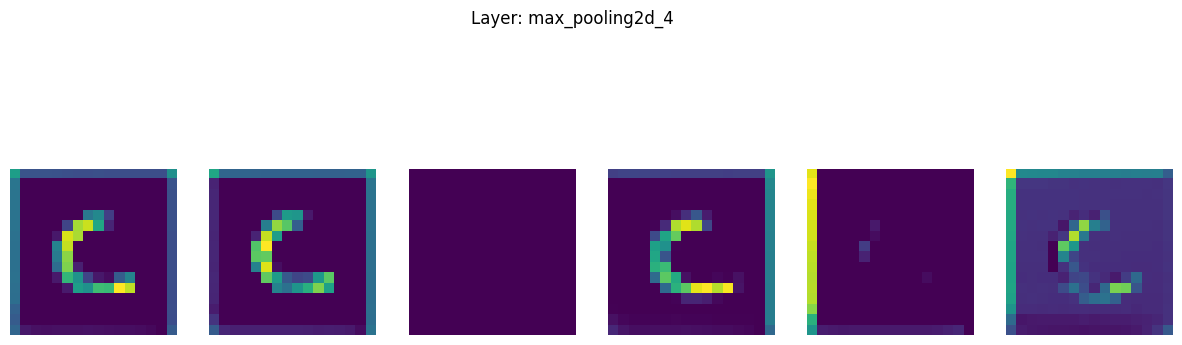

Layer: conv2d_5 | Output shape: (1, 16, 16, 128)


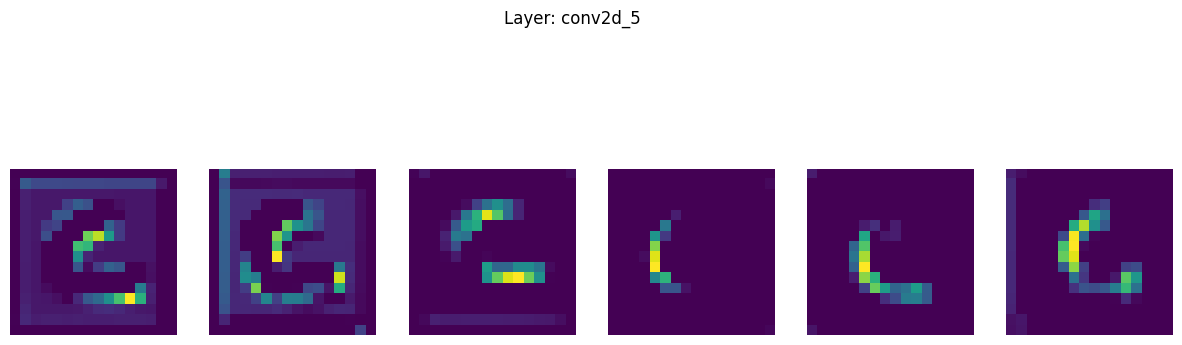

Layer: max_pooling2d_5 | Output shape: (1, 8, 8, 128)


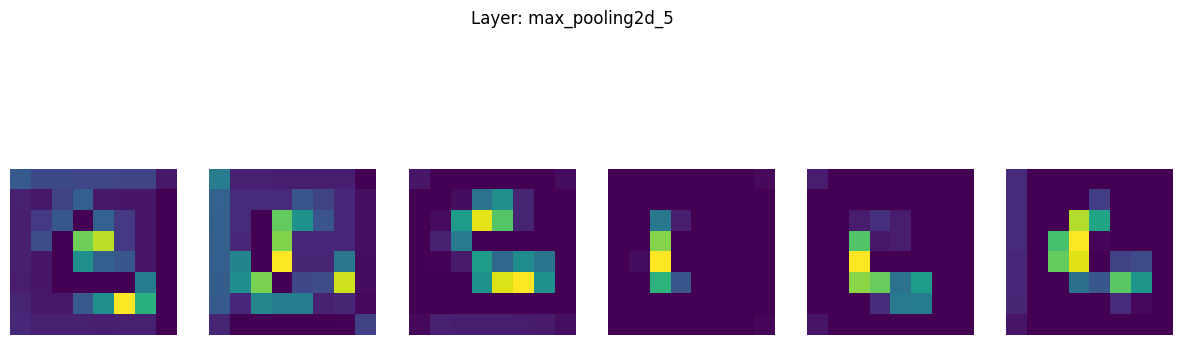

Layer: flatten_1 | Output shape: (1, 8192)
Layer: dense_2 | Output shape: (1, 128)
Layer: dropout_1 | Output shape: (1, 128)
Layer: dense_3 | Output shape: (1, 6)


In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

idx = np.random.randint(0, len(X_test))
img = X_test[idx:idx+1]

activations = activation_model.predict(img)

for layer_name, activation in zip([layer.name for layer in model.layers], activations):
    print(f"Layer: {layer_name} | Output shape: {activation.shape}")

    if len(activation.shape) == 4:
        n_features = min(activation.shape[-1], 6)
        fig, ax = plt.subplots(1, n_features, figsize=(15, 5))
        if n_features > 1:
            for i in range(n_features):
                ax[i].imshow(activation[0, :, :, i], cmap='viridis')
                ax[i].axis('off')
        else:
             ax.imshow(activation[0, :, :, 0], cmap='viridis')
             ax.axis('off')
        plt.suptitle(f"Layer: {layer_name}")
        plt.show()